# Исследование объявлений о продаже квартир

### Описание проекта
У нас есть данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определим рыночную стоимость объектов недвижимости. Нужно установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Описание данных 
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении

### Общая информация

In [1]:
import pandas as pd
import numpy as nmp
import seaborn as sbn
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


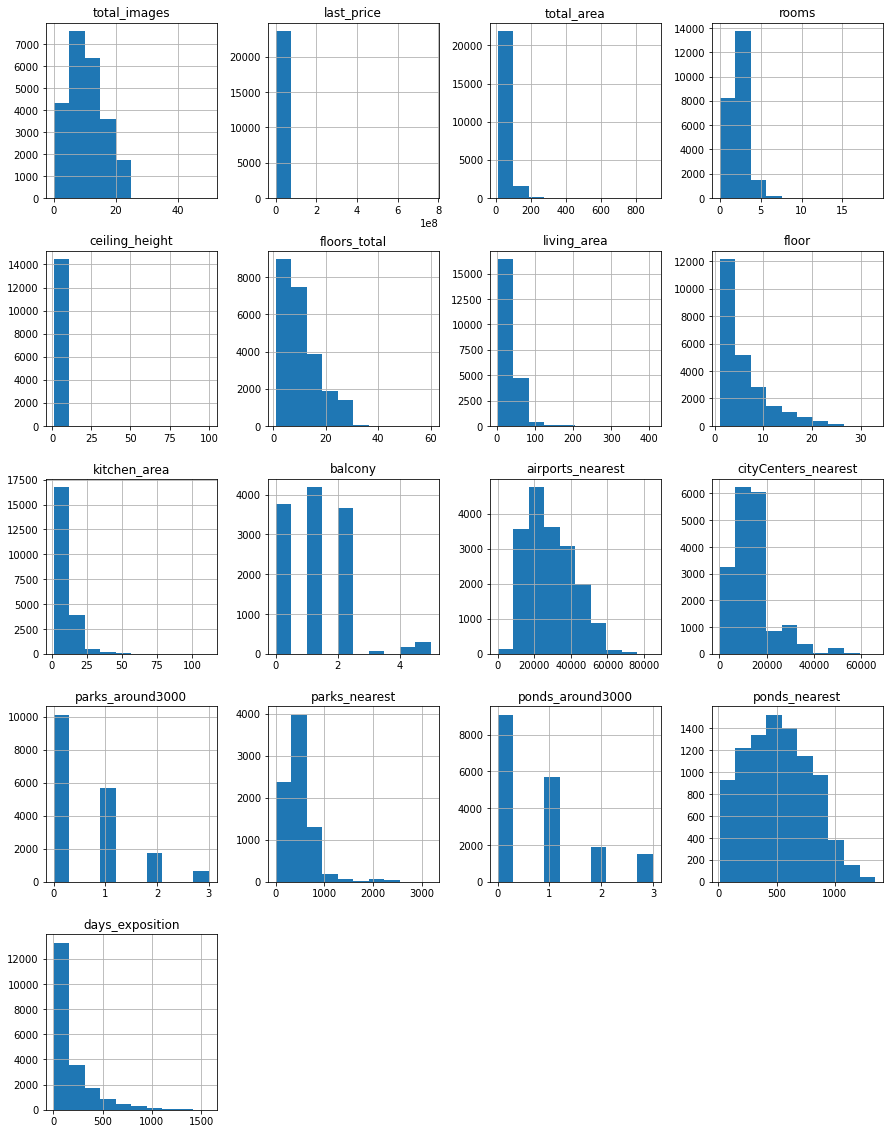

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.options.display.max_columns=100
data.info()
display(data.head(10))
data.hist(figsize=(15, 20))
plt.show()


### Предобработка данных

Сначала посмотрим, сколько пропусков имеется в каждом столбце таблицы

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [4]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Обработаем столбец first_day_exposition, переведем его содержимое из строк в даты. Это пригодится, чтобы вытащить из этого столба любую нужную информацию о времени. 

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Ознакомимся с остальными данными ближе. В различных столбцах различное количество пропущенных значений. Так, например, 
в столбце ceiling_height пропущено очень много значений - 9195 из 23699, что составляет почти треть от всех данных. Но значения столбца ceiling_height не являются критически важными для оценки стоимость квартир. Поэтому такие пропуски достаточно заполнить медианным значением по этому столбцу. 

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Обратимся к столбцам living_area и kitchen_area. Здесь пропуски в данных являются критичными, так как значения из этих столбцов напрямую влияют на стоимость квартиры. Понять приблизительную жилую площадь и площадь кухни можно, обратившись к столбцу total_area и посчитав медианные значения через соотношение значений для living_area к total_area и kitchen_area к total_area.

In [7]:
for area in ['living_area', 'kitchen_area']:
    data[area] = data[area].fillna((data[area].median() / data['total_area'].median()) * data['total_area'])

В столбце balcony также встречаются пропущенные значения, котороые говорят скорее всего о том, что балкона в кавартире нет. Здесь мы можем вместо пропущенных значений проставить 0.

In [8]:
data['balcony'] = data['balcony'].fillna(0)

В столбцах со значениями, пропущенными на основе картографических данных, также есть пропуски. Судя по тому, что пропусков больше всего для тех квартир, которые находятся за чертой города, можно сделать вывод, что объекты, для которых пропущены значения, находятся слишком далеко от квартиры. Оставим такие пропуски без изменений. 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

В столбцах rooms, floor, floors_total, days_exposition пропущенные данные можно заменить медианным значением. 

In [10]:
for value in ['rooms', 'floor', 'floors_total', 'days_exposition']:
    data[value] = data[value].fillna(data[value].median())

Заменим тип данных float на int в тех столбцах, в которых это возможно

In [11]:
for value in ['last_price', 'floors_total', 'airports_nearest', 'airports_nearest', 'cityCenters_nearest',
             'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']:
    data[value] = data[value].astype('int', errors="ignore")

Проверим теперь данные на предмет явных дубликатов

In [12]:
print('Количество одинаковых объявлений:', data.duplicated().sum())

Количество одинаковых объявлений: 0


Проверим, есть ли неявные дубликаты в названии населенных пунктов

In [13]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [14]:
#функция для переименования
def replace_locality(from_loc, to_loc):
    data['locality_name'] = data['locality_name'].replace(from_loc, to_loc, regex=True)
for from_loc, to_loc in [
    ('поселок', 'посёлок'),
    ('коттеджный поселок', 'посёлок'),
    ('коттеджный посёлок', 'посёлок'),
    ('поселок городского типа', 'посёлок'),
    ('поселок станции', 'посёлок'), 
    ('посёлок городского типа', 'посёлок'),
    ('посёлок при железнодорожной станции', 'посёлок'),
    ('посёлок станции', 'посёлок'),
    ('городской поселок', 'посёлок'),
    ('городской посёлок', 'посёлок'),
    ('садоводческое некоммерческое товарищество', 'садовое товарищество')
]:
    replace_locality(from_loc, to_loc)
    

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Посмотрим общее описание данных в таблице

In [16]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.667750,34.624296,5.892358,10.505495,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,169.360226
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.585961,22.381873,4.885249,6.039401,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,206.535633
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.173077,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Устраним редкие и выбивающиеся значения во всех столбцах

In [17]:
#функция для удаления редких значений
def data_quantile(value):
    Q1 = data[value].quantile(0.10)
    Q3 = data[value].quantile(0.90)
    IQR = Q3 - Q1
    data_IQR = data[(data[value] > (Q1 - 1.5*IQR)) & (data[value] < (1.5*IQR + Q3))]
    data_IQR.boxplot(column=value)

Посмотрим Boxplot для столбца total_area

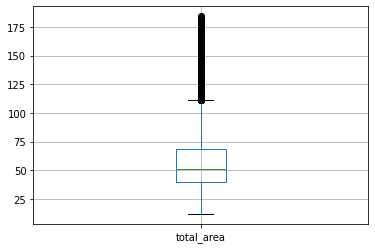

In [18]:
data_quantile('total_area')

По графику видно, что нижний ус оказался равным примерно 12.5 м, верхний - 112,5 м примерно. Выше верхнего уса находится довольно большое количество выбросов, но при этом медиана равна 50 м, значит выбросы выше верхнего квартиля всё же редкие. 

Посмотрим Boxplot для столбца living_area

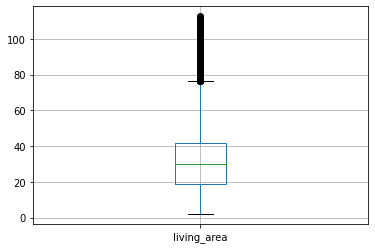

In [19]:
data_quantile('living_area')

По графику видно, что нижний ус стремится к 0, верхний - к 80 м. Выше верхнего уса находится довольно большое количество выбросов, но при этом медиана равна 30 м, значит выбросы выше верхнего квартиля всё же редкие.

Посмотрим Boxplot для столбца kitchen_area

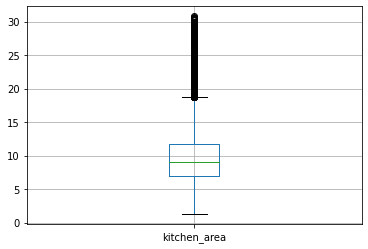

In [20]:
data_quantile('kitchen_area')

По графику видно, что нижний ус примерно равен 2 м, верхний - 18 м. Выше верхнего уса находится довольно большое количество выбросов, но при этом медиана равна 9 м, значит выбросы выше верхнего квартиля всё же редкие.

Посмотрим Boxplot для столбца last_price

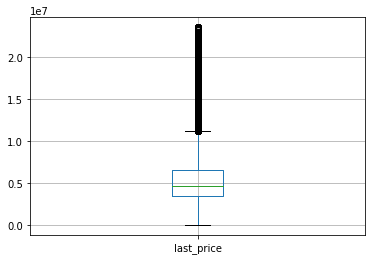

In [21]:
data_quantile('last_price')

По графику видно, что нижний ус равен 0 (не понимаю, что это значит? какие-то аномалии?). Верхний - чуть более 10 000 000. Выбросов выше верхнего уса очень много, но медиана при этом остается на уровне 5 000 000, значит эти выбросы редкие. 

Посмотрим Boxplot для столбца rooms

<function matplotlib.pyplot.show(close=None, block=None)>

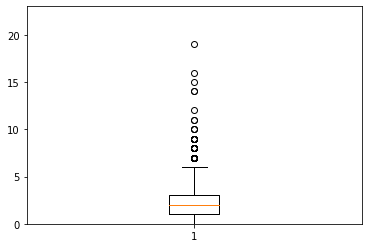

In [22]:
#data_quantile('rooms')
plt.boxplot(data['rooms'])
plt.ylim(0,23)
plt.show

По графику видно, что нижний ус упирается в 1, верхний - 6-7. Выше верхнего уса совсем немного выбросов, а медиана на уровне примерно 2-3.

Посмотрим Boxplot для столбца floor

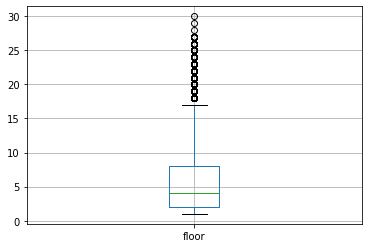

In [23]:
data_quantile('floor')

По графику видно, что нижний ус упирается в 1, верхний - 16-17. Выше верхнего уса совсем немного выбросов, а медиана на уровне примерно 4.

Посмотрим Boxplot для столбца floors_total

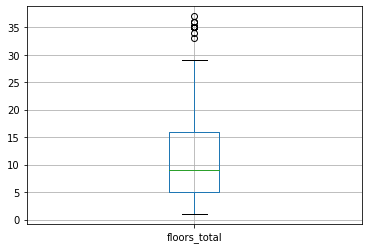

In [24]:
data_quantile('floors_total')

По графику видно, что нижний ус упирается в 1, верхний - около 29. Выше верхнего уса совсем немного выбросов, а медиана на уровне примерно 9.

Посмотрим Boxplot для столбца airports_nearest

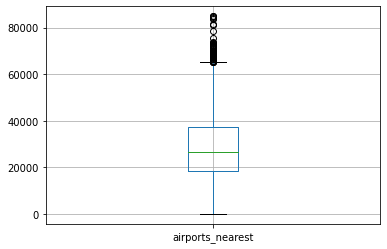

In [25]:
data_quantile('airports_nearest')

По графику видно, что выше верхнего уса, который равен приблизительно 65000, есть довольно большое количество выбросов, но медиана при этом не стремится вверх, ее значение чуть меньше 30000.

Посмотрим Boxplot для столбца cityCenters_nearest

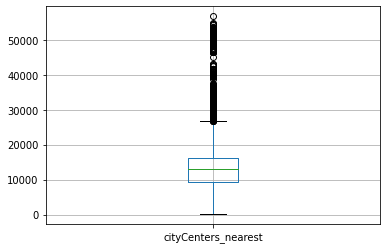

In [26]:
data_quantile('cityCenters_nearest')

По графику видно, что выше верхнего уса, который равен приблизительно 28000, есть довольно большое количество выбросов, но медиана при этом не стремится вверх, ее значение около 13000.

Посмотрим Boxplot для столбца parks_nearest

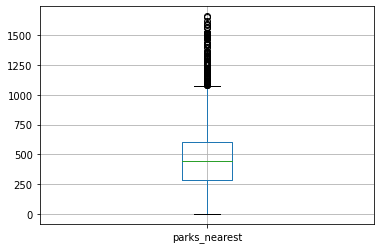

In [27]:
data_quantile('parks_nearest')

По графику видно, что выше верхнего уса, который равен приблизительно 1100, есть довольно большое количество выбросов, но медиана при этом не стремится вверх, ее значение около 400.

Посмотрим Boxplot для столбца ponds_nearest

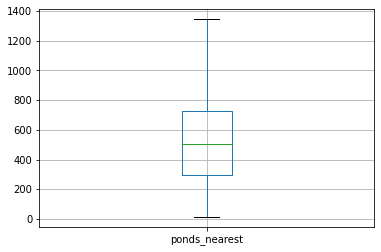

In [28]:
data_quantile('ponds_nearest')

По графику видно, что медиана здесь около 500 м. В СПб и окрестностях нет проблем с водоемами! =)

Посмотрим Boxplot для столбца days_exposition

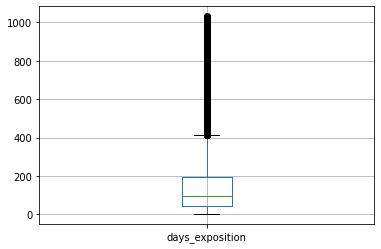

In [29]:
data_quantile('days_exposition')

По графику видно, что выше верхнего уса, который равен приблизительно 400, есть очень большое количество выбросов, но медиана при этом не стремится вверх, ее значение около 100.

Посмотрим, какие самые большие значения есть в столбце ceiling_height

In [31]:
def correct_сeiling_height(i): #функция, для перевода в метры
    if i >= 20:
        i = i/10
    return i
data['ceiling_height'] = data['ceiling_height'].apply(correct_сeiling_height) # заменим на нормальные значения

С попомщью метода boxplot мы посмотрели на медианные значения данных, размах "усов", то есть нормальные значения данных, а также увидели аномальные значения и отбросили их. Также в столбце ceiling_height заменили ошибочные введенные данные на корректные. 

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу столбец "год публикации объявления"

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим в таблицу столбец "месяц публикации объявления"

In [35]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим в таблицу столбец "день публикации объявления"

In [36]:
def day(data):
    first_day_exposition = data['first_day_exposition'].weekday()
    if first_day_exposition == 0:
        return 'понедельник'
    elif first_day_exposition == 1:
        return 'вторник'
    elif first_day_exposition == 2:
        return 'среда'
    elif first_day_exposition == 3:
        return 'четверг'
    elif first_day_exposition == 4:
        return 'пятница'
    elif first_day_exposition == 5:
        return 'суббота'
    elif first_day_exposition == 1:
        return 'воскресенье'

data['day_exposition'] = data.apply(day, axis=1)

Добавим в таблицу столбец "цена одного квадратного метра"

In [37]:
data['cost_1m'] = (data['last_price'] / data['total_area']).astype('int')

Добавим в таблицу столбец "тип этажа квартиры"

In [38]:
def type_floor(data):
    floor = data['floor']
    floors_total = data['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(type_floor, axis=1)

Добавим в таблицу столбец "расстояние в км до центра города"

In [39]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

### Исследовательский анализ данных

Построим гистограммы для каждого параметра:

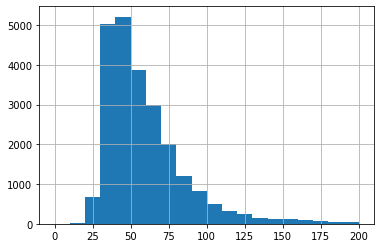

In [40]:
data['total_area'].hist(bins=20, range=(0,200))
plt.show()

Пик значений - 40-45 кв м

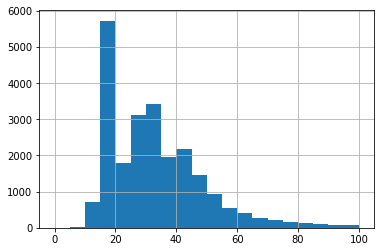

In [41]:
data['living_area'].hist(bins=20, range=(0,100))
plt.show()

Пик значений - около 20 кв м

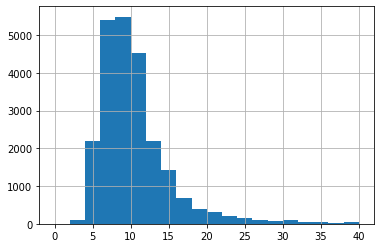

In [42]:
data['kitchen_area'].hist(bins=20, range=(0,40))
plt.show()

Пик значений - около 8 кв м

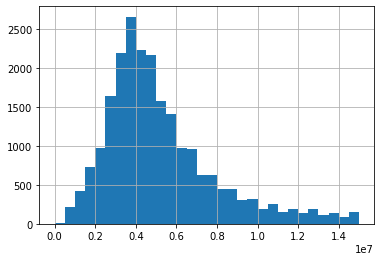

In [43]:
data['last_price'].hist(bins=30, range=(0, 15000000))
plt.show()

Пик значений - около 4 млн

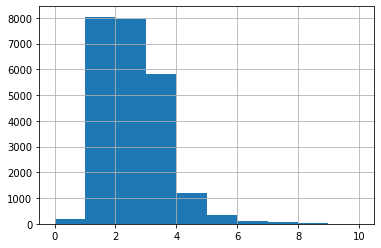

In [44]:
data['rooms'].hist(bins=10, range=(0,10))
plt.show()

Пик значений - 1-2 комнаты

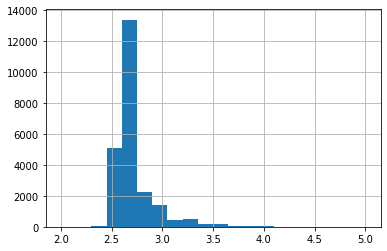

In [45]:
data['ceiling_height'].hist(bins=20, range=(2,5))
plt.show()

2,6 м - наиболее часто встречаемая высота потолков

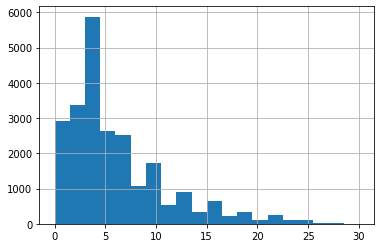

In [46]:
data['floor'].hist(bins=20, range=(0,30))
plt.show()

на 3-4 этажах расположено больше всего квартир

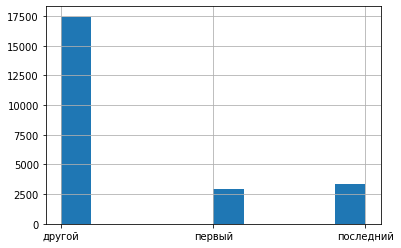

In [47]:
data['floor_type'].hist()
plt.show()

Болше всего квартир расположено не на первом и не на последнем этажах

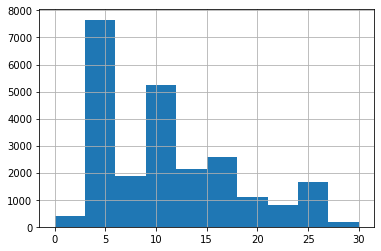

In [48]:
data['floors_total'].hist(bins=10, range=(0,30))
plt.show()

Больше всего пятиэтажных домов

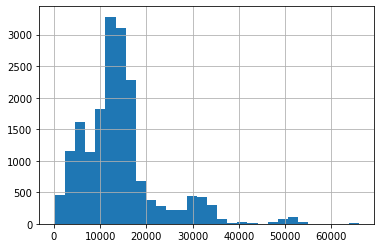

In [49]:
data['cityCenters_nearest'].hist(bins=30)
plt.show()

Пик значений - около 12 000 м

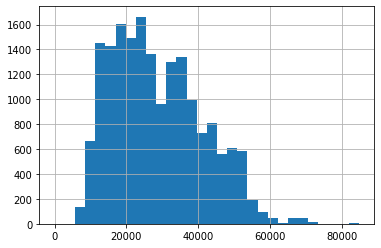

In [50]:
data['airports_nearest'].hist(bins=30)
plt.show()

Пик значений - около 26 000 м

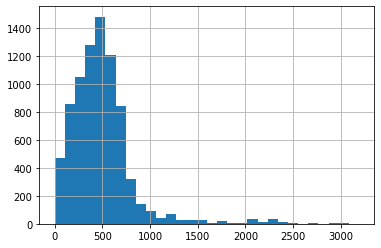

In [51]:
data['parks_nearest'].hist(bins=30)
plt.show()

Пик значений - около 500 м

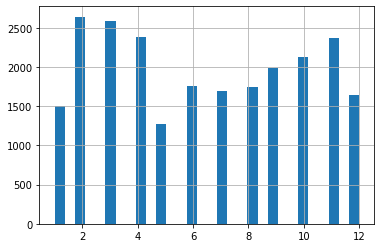

In [52]:
data['month_exposition'].hist(bins=30)
plt.show()

В феврале-марте опубликовано больше всего объявлений

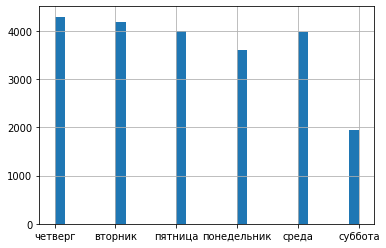

In [53]:
data['day_exposition'].hist(bins=30)
plt.show()

Во вторник и четверг публикуют больше всего объявлений

Посмотрим также, сколько дней продаются квартиры

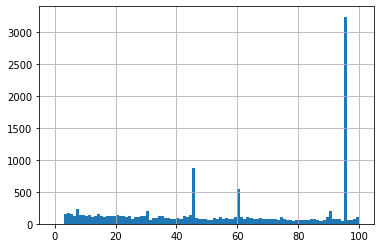

Среднее значение для days_exposition: 169.36022616988058
Медианное значение для days_exposition: 95.0


In [54]:
data['days_exposition'].hist(bins=100, range=(0,100))
plt.show()
print('Среднее значение для days_exposition:', data['days_exposition'].mean())
print('Медианное значение для days_exposition:', data['days_exposition'].median())

Обычно квартиры продаются около 95 дней (3 месяцев), но есть и немало значений, превышающих это значение, даже более 1000 дней, когда счет идет уже на года. При этом есть и сверхбыстрые продажи - в первые дни публикации объявления.

Посмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта

In [55]:
#построим сводную таблицу по параметрам:
#- общей площади;
#- жилой площади;
#- площади кухни;
#- количество комнат;
#- типа этажа, на котором расположена квартира (первый, последний, другой);
#- даты размещения (день недели, месяц, год)
data_last_price = data.pivot_table(index=[
    'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'days_exposition'],
                                  values='last_price')
display(data_last_price)

last_price
total_area living_area kitchen_area rooms floor_type days_exposition             
12.0       10.000000   2.100        1     другой     200.0              2400000.0
13.0       7.500000    2.275        1     другой     24.0               1850000.0
                                          первый     410.0              1400000.0
           10.000000   2.275        1     другой     9.0                3800000.0
13.2       7.615385    2.310        1     первый     19.0               1686000.0
...                                                                           ...
590.0      409.000000  100.000      15    другой     14.0              65000000.0
618.0      258.000000  70.000       7     другой     111.0            300000000.0
631.0      364.038462  60.000       7     последний  95.0             140000000.0
631.2      322.300000  19.500       7     последний  95.0             140000000.0
900.0      409.700000  112.000      12    последний  106.0            420000000.0

[23474 rows x 1 columns]

Корреляция равна: 0.6536750579657242


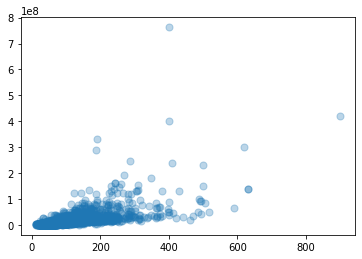

In [56]:
#посмотрим на корреляцию между общей площадью и ценой
plt.scatter(data['total_area'], data['last_price'], s=50, alpha=0.3)
print('Корреляция равна:', data['total_area'].corr(data['last_price']))

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            2775 non-null   object        
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            23699 non-null  float6

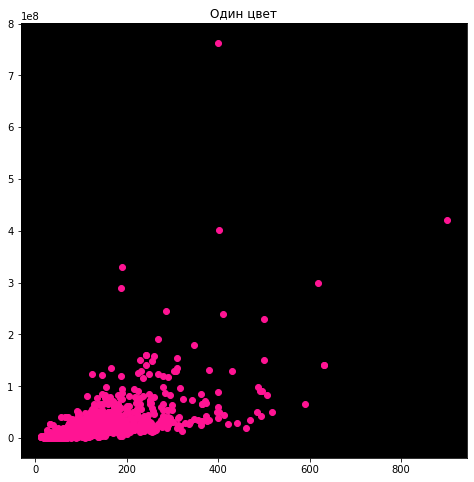

In [58]:
import numpy as np
import matplotlib.pyplot as plt

x = data['total_area']    #  x - координаты точек
y =  data['last_price']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink')    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('Один цвет')     #  заголовок для Axes

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()


По графику видна что прямая корреляция между данными есть, хотя и не очень сильная.

Корреляция равна: 0.5858907700395659


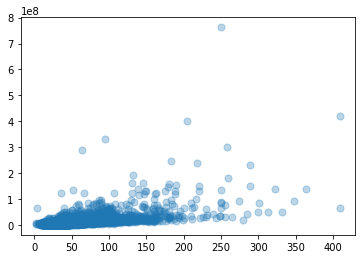

In [59]:
#посмотрим на корреляцию между жилой площадью и ценой
plt.scatter(data['living_area'], data['last_price'], s=50, alpha=0.3)
print('Корреляция равна:', data['living_area'].corr(data['last_price']))

По графику видна что прямая корреляция между данными есть, хотя и не очень сильная.

Корреляция равна: 0.5141194369951924


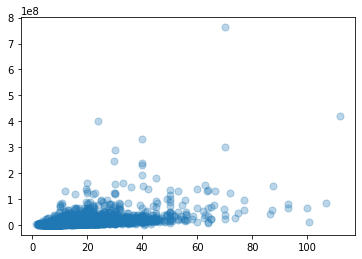

In [60]:
#посмотрим на корреляцию между площадью кухни и ценой
plt.scatter(data['kitchen_area'], data['last_price'], s=50, alpha=0.3)
print('Корреляция равна:', data['kitchen_area'].corr(data['last_price']))

По графику видна что прямая корреляция между данными есть, хотя и не очень сильная.

Корреляция равна: 0.3633428499648948


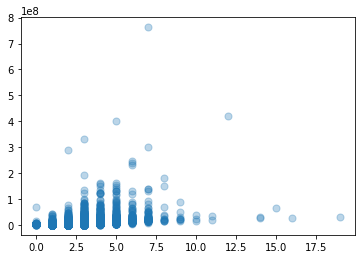

In [61]:
#посмотрим на корреляцию между количеством комнат и ценой
plt.scatter(data['rooms'], data['last_price'], s=50, alpha=0.3)
print('Корреляция равна:', data['rooms'].corr(data['last_price']))

Корреляции не обнаружено. Построим для этого случая линейный график

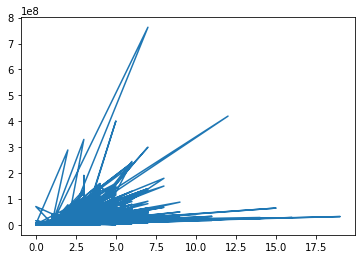

In [56]:
x = data['rooms']
y = data['last_price']
plt.plot(x, y)
plt.show()

Линейной зависимости не обнаружено

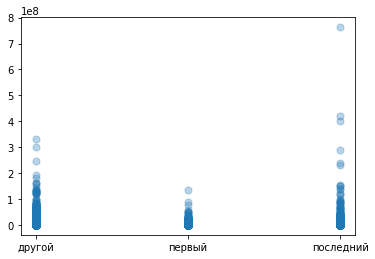

In [62]:
#посмотрим на корреляцию междутипом этажа и ценой
plt.scatter(data['floor_type'], data['last_price'], s=50, alpha=0.3)

Корреляции не обнаружено. Построим для этого случая линейный график

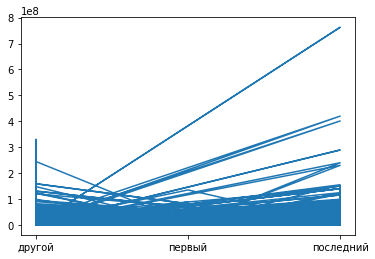

In [57]:
x = data['floor_type']
y = data['last_price']
plt.plot(x, y)
plt.show()

Линейной зависимости не обнаружено. На последних этажах цены на квартиры бывают выше, чем на остальных этажах.

Корреляция равна: 0.06546895874432727


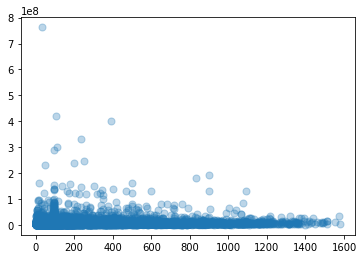

In [63]:
#посмотрим на корреляцию между датой размещения и ценой
plt.scatter(data['days_exposition'], data['last_price'], s=50, alpha=0.3)
print('Корреляция равна:', data['days_exposition'].corr(data['last_price']))

Особой зависимости между датой размещения и ценой нет, хотя возможно есть небольшая обратная корреляция

Посмотрим, есть ли зависимость цены от года, месяца, дней недели

Корреляция равна: -0.043089036199508615


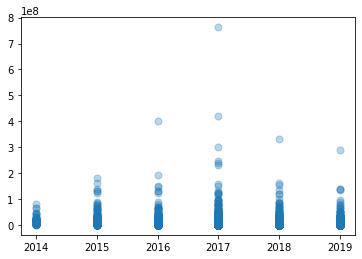

In [64]:
#посмотрим на корреляцию между годом размещения и ценой
plt.scatter(data['year_exposition'], data['last_price'], s=50, alpha=0.3)
print('Корреляция равна:', data['year_exposition'].corr(data['last_price']))

Корреляции не обнаружено. Построим для этого случая линейный график

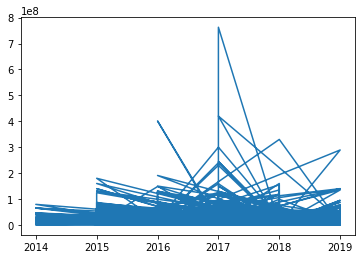

In [58]:
x = data['year_exposition']
y = data['last_price']
plt.plot(x, y)
plt.show()

Линейной зависимости не обнаружено. Но в 2017 году цены на квартиры были самыми высокими

Корреляция равна: 0.0027791287507397166


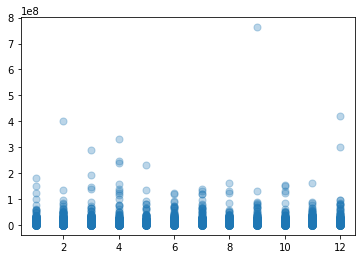

In [65]:
#посмотрим на корреляцию между месяцем размещения и ценой
plt.scatter(data['month_exposition'], data['last_price'], s=50, alpha=0.3)
print('Корреляция равна:', data['month_exposition'].corr(data['last_price']))

Корреляции не обнаружено. Построим для этого случая линейный график

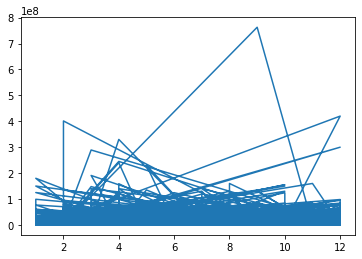

In [59]:
x = data['month_exposition']
y = data['last_price']
plt.plot(x, y)
plt.show()

Линейной зависимости не обнаружено

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [67]:
locality_data = data.pivot_table(index='locality_name', values='cost_1m', aggfunc='count')
locality_data.columns = ['count_1']
display(locality_data.sort_values(by='count_1', ascending=False).head(10))

,count_1
locality_name,
Санкт-Петербург,15721
посёлок Мурино,556
посёлок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
деревня Кудрово,299


In [69]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15721,5500000.0
посёлок Мурино,556,3400000.0
посёлок Шушары,440,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


In [74]:
loc_mean = data.groupby('locality_name').agg({'cost_1m':'count', 'last_price':'median'}) \
    .sort_values(by = 'cost_1m', ascending = False) \
    .head(10)
loc_mean

,cost_1m,last_price
locality_name,,
Санкт-Петербург,15721,5500000.0
посёлок Мурино,556,3400000.0
посёлок Шушары,440,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


In [75]:
print('Самая высокая стоимость:', loc_mean['cost_1m'].max())
print('Самая низкая стоимость:', loc_mean['cost_1m'].min())

Самая высокая стоимость: 15721
Самая низкая стоимость: 237


Самая высокая стоимость за 1 кв м - в Петербурге, самая низкая - в одном из удаленных городов ЛО - Выборге.

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра

In [79]:
spb_cost_1km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km',
                                                                           values='last_price',
                                                                            aggfunc='mean')
spb_cost_1km = spb_cost_1km.reset_index()
display(spb_cost_1km)

,cityCenters_nearest_km,last_price
0,0.0,3.144912e+07
1,1.0,2.120672e+07
2,2.0,1.778832e+07
3,3.0,1.112658e+07
4,4.0,1.330428e+07
5,5.0,1.449912e+07
6,6.0,1.533842e+07
7,7.0,1.477515e+07
8,8.0,9.957717e+06
9,9.0,6.950659e+06


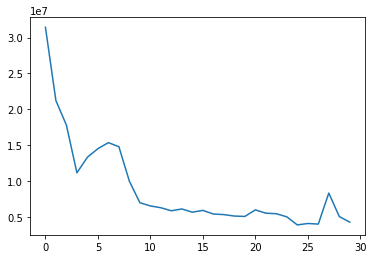

In [82]:
x = spb_cost_1km['cityCenters_nearest_km'] 
y =  spb_cost_1km['last_price']
plt.plot(x, y)
plt.show()

Цены на квартире ожидаемо оказались самыми высокими в центре города. По мере удаленности от центра цены становятся ниже. Есть небольшой пик в районе 30-километровой удаленности, возможно там есть застройка элитного жилья. 

### Общий вывод

Что было сделано в проекте:
1. Изучены общие данные: что есть в сводной таблице, какой тип данных к кадом столбце, где есть пропуски и как они влияют на все данные в целом.
2. Там, где это возможно данные почищены - какие-то данные заменили медианным значением, где-то просто удалены пропуски, если эти данные не влияли на общую картину, где-то округлены цифры для более удобного дальнейшего подсчета, где-то заменены типы данных, устранены неявные дубликаты в названиях населенных пунктов.
3. Для того, чтобы собрать более полный анализ были добавлены новые столбцы в таблицу, такие как цена за 1 кв м, день, месяц и год публикации, тип этажа квартиры и расстояние до центра в км.
4. Далее был проведен исследовательский анализ данных: были построены гистограммы, сделаны по ним выводы, с помощью графиков scatterplot и линейных диаграмм изучено влияние различных параметров квартир на их стоимость. 

По результатам исследования можно сделать такие выводы:
    1. В среднем общая площадь квартир составляет 40-45 кв м
    2. Жилая площадь квартир - 20 кв м, площадь кухонь - 8 кв м
    3. Медианное значение конечной стоимости квартир - 4 млн рублей
    4. Наиболее часто встречаются в продаже 1-2 - комнатные квартиры
    5. Высота потолков - 2,6 м
    6. Больше всего квартир продается не на первом и последнем этажах, а на третьем-четвертом.
    7. Больше всего квартир продается в 5-этажных домах
    8. В основном удаленность от центра составляет 12 км, от аэропорта - 26 км, а от ближайшего парка - 500 м
    9. Больше всего публикаций о продаже квартир было сделано в феврале-марте, по дням недели - во вторник и четверг
    10. Обычно квартиры продаются около 95 дней (3 месяцев), но есть и немало значений, превышающих это значение, даже более 1000 дней. Пик продаж приходится на 45, 60 и 90ый дни после размещения объявления. 

Есть небольшая прямая корреляция между общей площадью, жилой площадью и площадью кухни и конечной стоимостью квартир. 
Корреляции между количеством комнат и стоимость квартиры не обнаружено.
Наибольшая стоимость 1 кв м в самом СПб, эта стоимость уменьшается по мере удаления от центра. При этом есть небольшое повышение стоимости в районе 30 км удаления от центра. Наименьшая стоимость - в Выборге. 
